# 支持向量机
- Support Vector Machine   
解决的问题: 
   - 什么样的决策边界是最好的
   - 如果数据本身难分:需要将数据映射到高维空间
   - 计算复杂度怎么样,是否能实际应用

## 1. 什么是最好的决策边界
- 间隔最大化: 两个类别的最近样本点到决策边界的距离最大(垂直距离)
- Large Margin Classifier   
距离公式:   
$\frac{1}{||w||}|w^Tx+b|$

## 2. 数据标签定义
- 数据集: $D = \{(x_1,y_1), (x_2,y_2),...,(x_m,y_m)\}$
- 标签: x为正例, y=1; x为负例, y=-1
- 决策方程: $y(x) = sign(w^Tx+b)$
    - $y \cdot (w^Tx+b) > 0$ 正例

## 3. 优化的目标
- 找到一条线(w和b), 使得离线最近的点到线的距离最大
- 点到直线的距离化简: $\frac{y\cdot(w^Tx+b)}{||w||}$

## 4. 目标函数
- 放缩变换: 对于决策方程(w,b) 可以通过放缩变换, 使得最近的点到决策边界的距离为1, 即: $|y| >= 1$
- 优化目标:     
$arg max_{w,b} \frac{1}{||w||}min_{i=1,...,m}y_i(w^Tx_i+b)$     
因为$|y| >= 1$, 所以只考虑:     
$arg max_{w,b} \frac{1}{||w||}$
- 优先满足条件: $y_i(w^Tx_i+b) >= 1$, 既优先缩放$|y| >= 1$
- 通过将求极大值问题转化为求极小值问题, 优化目标函数: $min_{w,b} \frac{1}{2}||w||^2$. 加上$\frac{1}{2}$是为了求导方便
- 通过拉格朗日乘子法求解
    - $L(w,b,\alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^{m}\alpha_i(y_i(w^Tx_i+b)-1)$         
    $\alpha_i$为拉格朗日乘子      
    - 求解: $\frac{\partial L}{\partial w} = 0, \frac{\partial L}{\partial b} = 0$
    - 得到: $w = \sum_{i=1}^{m}\alpha_iy_ix_i$
    - 代入L, 得到: $L(w,b,\alpha) = \sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j$
    - 优化目标: $max_{\alpha}L(w,b,\alpha)$
    - 优化条件: $\alpha_i >= 0, \sum_{i=1}^{m}\alpha_iy_i = 0$
    - 求$\alpha$极大值, 转化成求$\alpha$极小值问题:
        - $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j - \sum_{i=1}^{m}\alpha_i$
        - 条件为: $\alpha_i >= 0, \sum_{i=1}^{m}\alpha_iy_i = 0$
- 假设有三个数据点:X1(3,3), X2(4,3), X3(1,1)
- 标签: Y1=1, Y2=1, Y3=-1
- 求解: $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j - \sum_{i=1}^{m}\alpha_i$
- 带入点:
    - $\frac{1}{2}(18\alpha_1^2+25\alpha_2^2+2\alpha_3^2+42\alpha_1\alpha_2-12\alpha_1\alpha_3-14\alpha_2\alpha_3) - \alpha_1 - \alpha_2 - \alpha_3$
- 因为$\alpha_1+\alpha_2 =\alpha_3$:
    - $4\alpha_1^2+\frac{13}{2}\alpha_2^2+10\alpha_1\alpha_2-2\alpha_1 - 2\alpha_2$
    - 分别对$\alpha_1, \alpha_2$求偏导, 得到:
        - $\alpha_1 = 1.5$
        - $\alpha_2 = -1$
    - 由于约束条件, 所有$\alpha$都要大于等于0, 所以解在边界上, 我们要考虑约束调条件,所以带入分别等于0时:
        - $\alpha_1 = 0$
            - $\alpha_2 = -2/13$ 也不成立
        - $\alpha_2 = 0$
            - $\alpha_1 = 0.25$ 满足条件
    - 所以最小值在(0.25, 0, 0.25)
- 求解w:
    - $w = \sum_{i=1}^{m}\alpha_iy_ix_i$
        - 带入: $w = 0.25*1*[3,3] + 0*1*[4,3] + 0.25*-1*[1,1] = [0.5, 0.5]$
- 求解b:
    - $b = y_i - w^Tx_i$
        - 带入: $b = 1 - [0.5, 0.5]*[3,3] = 1 - 3 = -2$
- 决策方程: $y(x) = sign([0.5, 0.5]*x - 2)$

## 5. 支持相量: 真正发挥作用的数据点, $\alpha$ 不为0的点

## 6. 参数: 
- soft margin SVM: 允许一定的数据点不满足约束条件(考虑噪音点的存在)
- 引入松弛变量$\xi_i$, 使得约束条件变为: $y_i(w^Tx_i+b) >= 1 - \xi_i$
- 优化目标变为: $min_{w,b,\xi}\frac{1}{2}||w||^2 + C\sum_{i=1}^{m}\xi_i$
    - 需要的参数C: 松弛变量的权重, C越大, 松弛变量越小(越不允许有噪音点)

## 7. 核变化
- 对于线性不可分的数据, 需要将数据映射到高维空间
- 通过核函数: $K(x_i,x_j) = \phi(x_i)^T\phi(x_j)$
    - 第二个参数核函数: 线性核, 多项式核, 高斯核(大部分情况下使用)

实际操作:
- 与传统算法相比, SVM能带来哪些效果
- 软间隔的作用, 如何解决过拟合
- 核函数的作用, 如何选择核函数  

In [30]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore') 

## 支持向量机能达到的效果

In [31]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=9999999999999999)
svm_clf.fit(X, y)


SVC(C=9999999999999999, kernel='linear')

In [42]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
        
        
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    


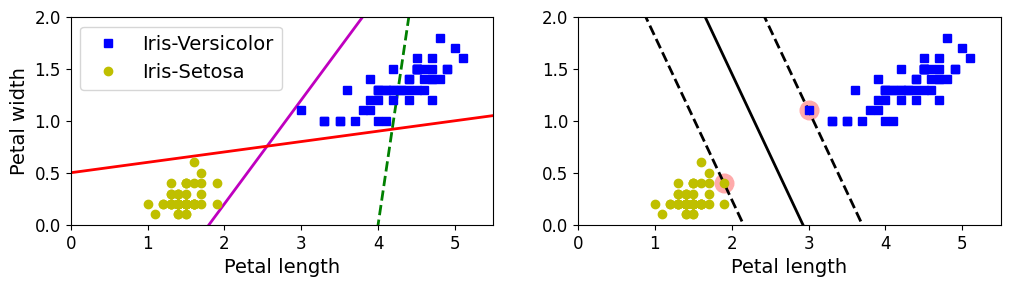

In [33]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

数据标准化的影响
必须标准化

软间隔
- 使用C控制软间隔程度

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

不同C的差异: 


In [35]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [36]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [37]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [44]:
svm_clf2.predict([[5.5, 1.7]])

array([1.])

In [45]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])


(np.float64(4.0), np.float64(6.0), np.float64(0.8), np.float64(2.8))

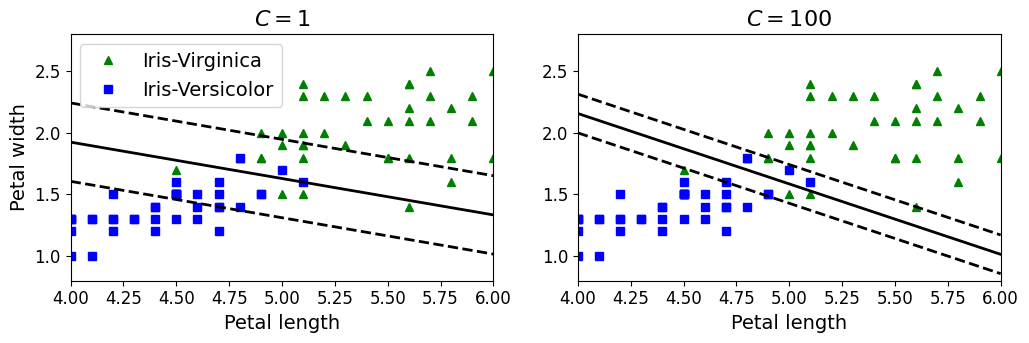

In [46]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])


- 右侧高C值, 分类器减少误分类
- 左侧低C值, 间隔更大, 但是很多数据会在间隔之内  

## 非线性SVM

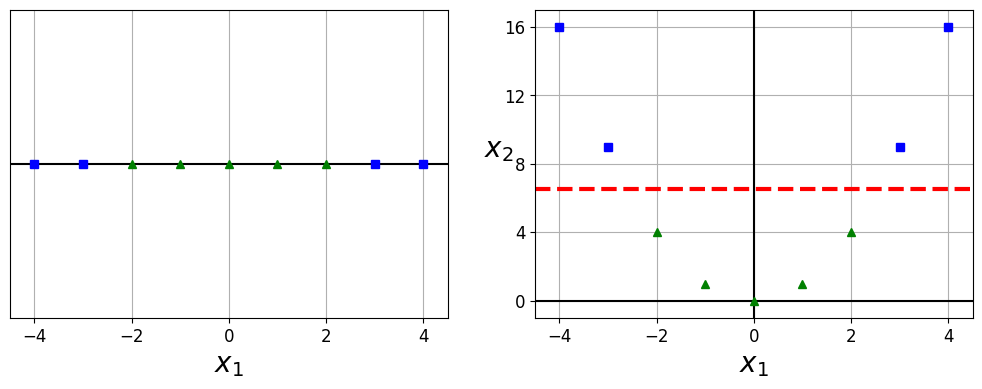

In [48]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)


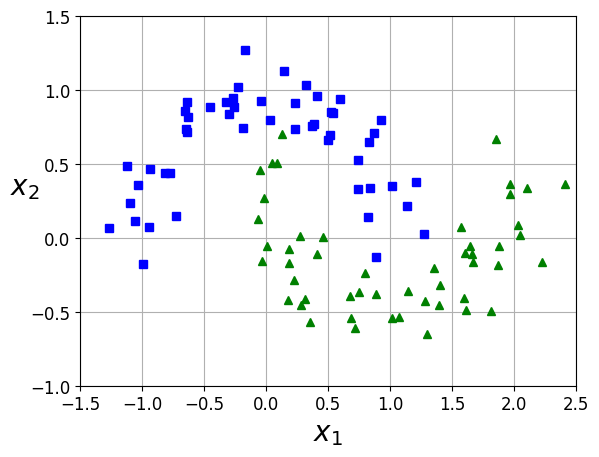

In [49]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [50]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

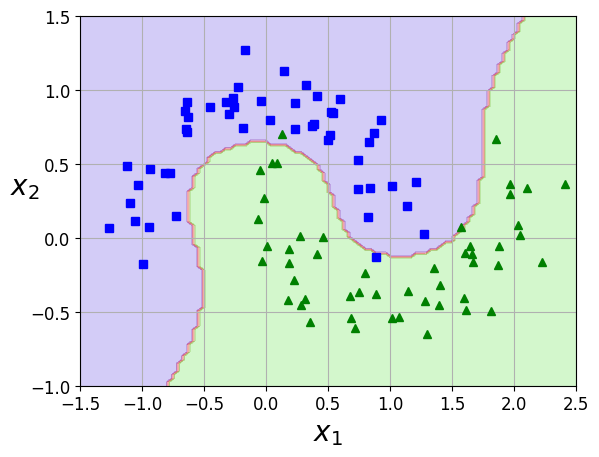

In [63]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap='brg', alpha=0.2)
    # plt.contourf(x0, x1, y_decision, cmap='brg', alpha=0.1)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

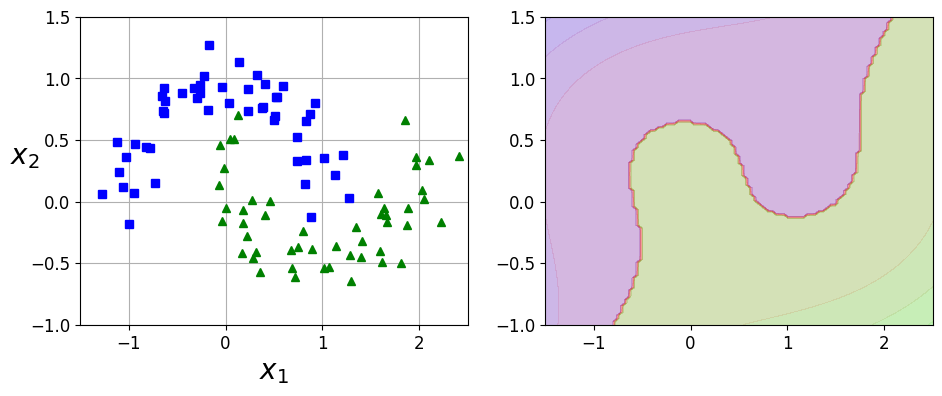

In [54]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [55]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

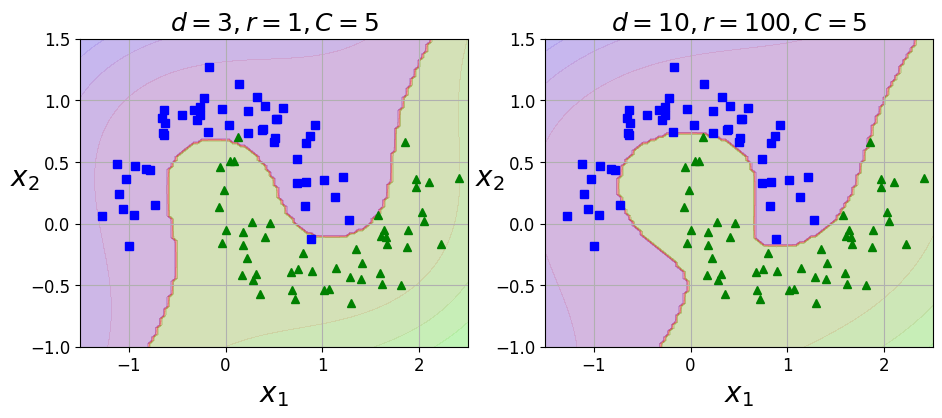

In [56]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

高斯核函数:
- 利用相似度来变换数据

- 选择一份一维数据集, 并在$x_1=-2$和$x_1=1$处为其添加两个高斯函数
- 接下来 将相似度函数定义为$\gamma = 0.3$ 的径向基函数(RBF)
$$\phi_{\gamma}(x, \ell) = exp(-\gamma||x-\ell||^2)$$
例如: $x = -1$ : 它位于第一个地标距离为1 的地方, 距离第二个地标距离为2. 因此, 其新特征是$x_2 = exp(-0.3*1^2) \approx 0.74$和$x_3 = exp(-0.3*2^2) \approx 0.30$

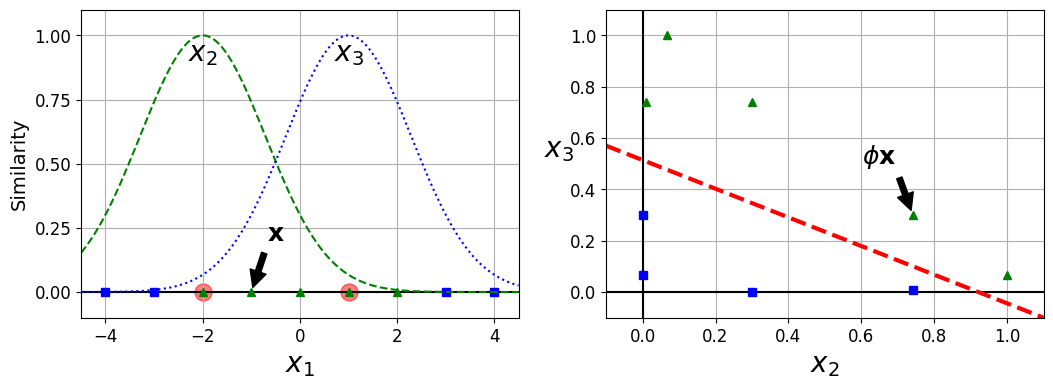

In [57]:
from sklearn.svm import SVC

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")

plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\mathbf{x}$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

plt.show()

理论情况下会对每一个实例(样本数据点) 创建一个地标, 从而转换数据集, 但是实际上会导致更多的特征, 从而增加计算复杂度.
- 从mn数据集变成 mm 数据集

SVM中利用核函数的计算技巧, 大大降低了计算复杂度:
- 增加 gamma $\gamma$ 使得高斯曲线变窄, 从而使得每个实例的影响范围变小, 决策边界更不规则, 在个别实例周围摆动
- 减少 $\gamma$ 使得高斯曲线变宽, 从而使得每个实例的影响范围变大, 决策边界更平滑

In [58]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

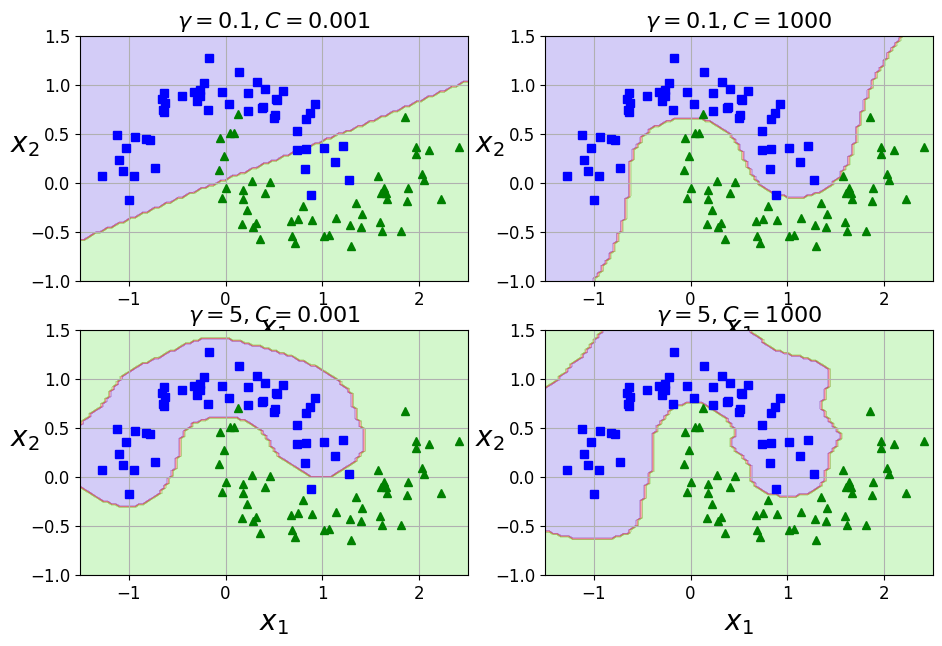

In [64]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()